**Data Collection**

In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
print(f"Current Directory: {os.getcwd()}")

Current Directory: /home/jovyan/work/notebooks


In [3]:
df = pd.read_csv('/home/jovyan/work/data/raw/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.select_dtypes(include=['object']).nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [8]:
for col in ['Geography', 'Gender'] :
    if col in df.columns:
        print(f"\n{col}: {df[col].unique()}")


Geography: ['France' 'Spain' 'Germany']

Gender: ['Female' 'Male']


In [9]:
# Target Balance
df['Exited'].value_counts(normalize=True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

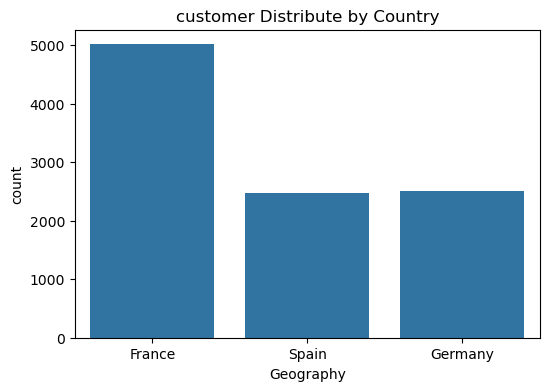

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Geography')
plt.title('customer Distribute by Country')
plt.show()

/tmp/ipykernel_272/2390263750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='Age', ax=ax[0], palette='coolwarm')


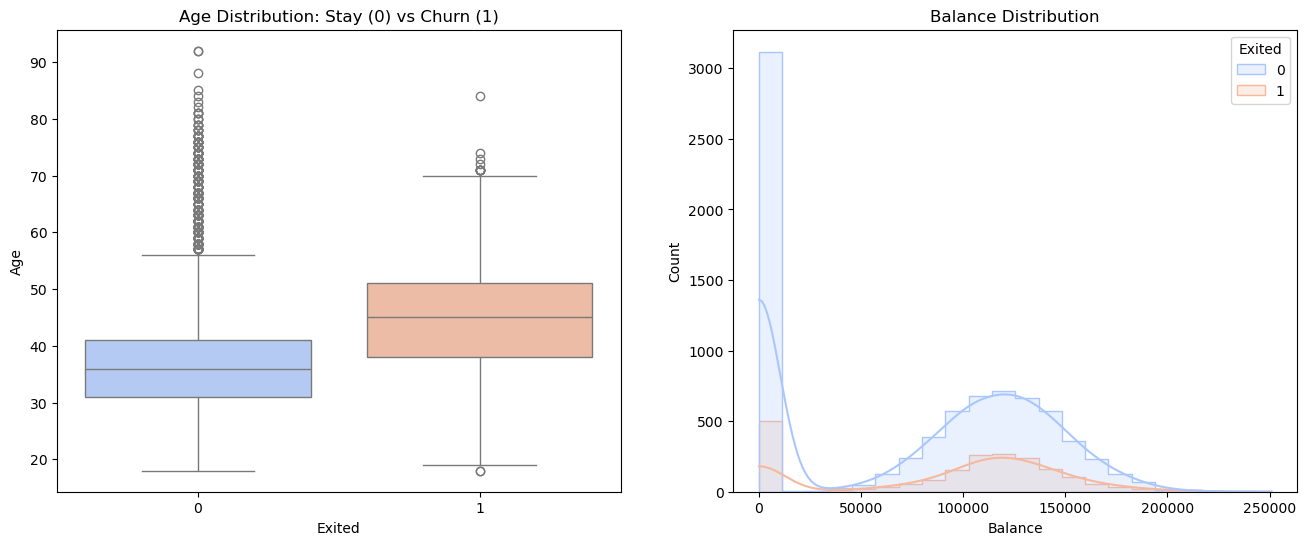

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. Boxplot: ดูการกระจายตัวของ "อายุ" แยกตามกลุ่ม "อยู่ vs หนี"
sns.boxplot(data=df, x='Exited', y='Age', ax=ax[0], palette='coolwarm')
ax[0].set_title('Age Distribution: Stay (0) vs Churn (1)')

# 2. KDE Plot: ดูยอดเงิน (Balance)
sns.histplot(data=df, x='Balance', hue='Exited', kde=True, ax=ax[1], palette='coolwarm', element="step")
ax[1].set_title('Balance Distribution')

plt.show()

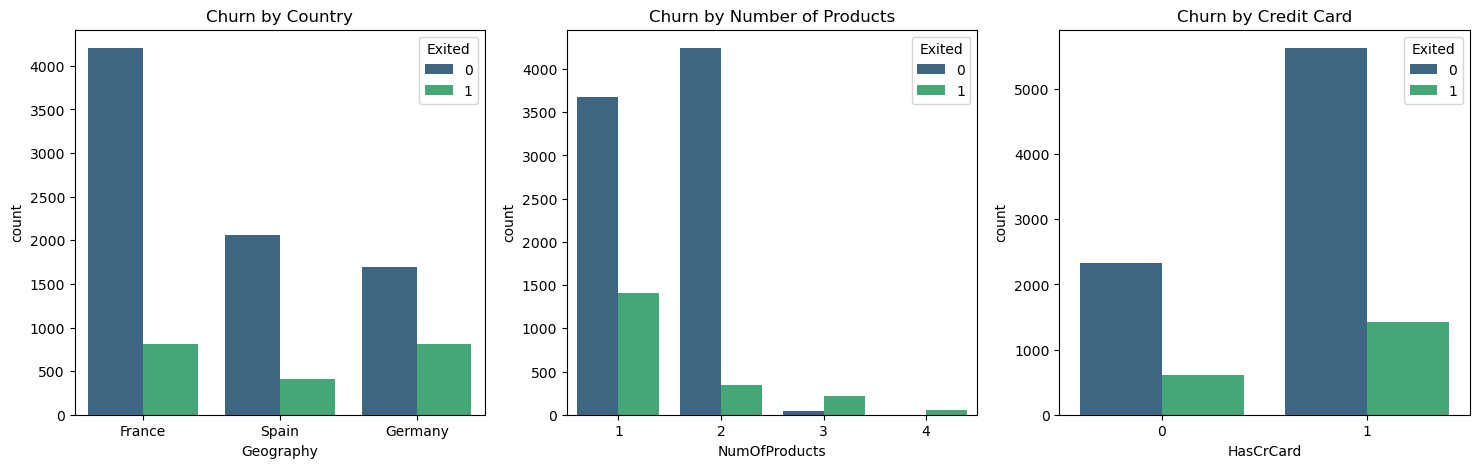

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 1. ประเทศไหนหนีเยอะสุด?
sns.countplot(data=df, x='Geography', hue='Exited', ax=ax[0], palette='viridis')
ax[0].set_title('Churn by Country')

# 2. ใช้ผลิตภัณฑ์กี่ตัวถึงจะดี? (1, 2, 3 หรือ 4)
sns.countplot(data=df, x='NumOfProducts', hue='Exited', ax=ax[1], palette='viridis')
ax[1].set_title('Churn by Number of Products')

# 3. บัตรเครดิต (HasCrCard) เกี่ยวไหม?
sns.countplot(data=df, x='HasCrCard', hue='Exited', ax=ax[2], palette='viridis')
ax[2].set_title('Churn by Credit Card')

plt.show()

In [13]:
corr_matrix =df.corr(numeric_only=True)
churn_correlations =corr_matrix['Exited']
print(churn_correlations.sort_values(ascending=False))

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


**Data Preprocessing**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_clean =df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df_clean = pd.get_dummies(df_clean, columns=['Geography', 'Gender'], drop_first=True)

In [16]:
X =df_clean.drop(columns=['Exited'])
y =df_clean['Exited']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Modeling**

In [18]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score

In [19]:
xgb_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])
xgb_param_grid = {
    'model__learning_rate': [0.01, 0.1],
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6, 10]
}
xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3, scoring='recall', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
print(f"✅ XGB Best Params: {xgb_grid.best_params_}")
print(f"✅ XGB Best Recall (CV): {xgb_grid.best_score_:.2f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/opt/conda/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:22:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:22:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:22:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:22:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/conda/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:22:15] WARNING: /w

✅ XGB Best Params: {'model__learning_rate': 0.01, 'model__max_depth': 6, 'model__n_estimators': 100}
✅ XGB Best Recall (CV): 0.69


/opt/conda/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:22:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
print(classification_report(y_test, xgb_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1593
           1       0.52      0.69      0.60       407

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.81      0.82      2000



In [23]:
final_model = xgb_grid.best_estimator_ 
y_proba = final_model.predict_proba(X_test)[:, 1]

thresholds_list = np.arange(0.1, 0.95, 0.05) 
results = []

for t in thresholds_list:
    y_pred_custom = (y_proba >= t).astype(int)
    
    recall = recall_score(y_test, y_pred_custom)
    precision = precision_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    
    results.append({
        'Threshold': round(t, 2),
        'Recall': recall,
        'Precision': precision,
        'F1-Score': f1
    })

df_results = pd.DataFrame(results)

print("\n--- ผลการทดสอบ Threshold ---")
display(df_results.sort_values(by='F1-Score', ascending=False).head(10))


--- ผลการทดสอบ Threshold ---


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Threshold,Recall,Precision,F1-Score
10,0.60,0.574939,0.632432,0.602317
9,0.55,0.626536,0.575621,0.600000
11,0.65,0.523342,0.696078,0.597475
8,0.50,0.687961,0.524345,0.595112
7,0.45,0.722359,0.485149,0.580454
6,0.40,0.788698,0.436735,0.562172
5,0.35,0.872236,0.369792,0.519386
12,0.70,0.373464,0.775510,0.504146
4,0.30,0.941032,0.319167,0.476665
3,0.25,0.975430,0.276078,0.430352


In [25]:
import joblib

# 1. ดึงโมเดลที่ดีที่สุดออกมา (จากที่เราจูน XGBoost ไว้)
best_model = xgb_grid.best_estimator_

# 2. บันทึกเป็นไฟล์ .joblib
joblib.dump(best_model, '/home/jovyan/work/models/bank_churn_model.joblib')

print("✅ บันทึกโมเดลสำเร็จ: bank_churn_model.joblib")

✅ บันทึกโมเดลสำเร็จ: bank_churn_model.joblib
